# Aiming for premium sales through behavior analysis of financial app

In this Machine Learning project, we are working on financial application data and predict the customer who will take a premium version app subscription or not. Then the company will take action on the customers to give the offers or not. The data contain the customer’s behavior and our job to find the insights from it.

# Bussines Problem

The Financial Technology company (Fin-Tech Company) launch there a mobile app. This app used for financial purposes like bank loans, savings, etc. in one place. It has two versions free and premium. The free version app contains basic features and customer wants to use the premium feature then they have to pay some amount to unlock it.

The main goal of the company is to sell the premium version app with low advertisement cost but they don’t know how to do it. That’s a reason they are provided the premium feature in the free version app for 24 hours to collect the customer’s behavior. After that, the company hired the Machine Learning Engineer to find insight from the collected data (customer’s behavior).

The job of the ML engineer is to find or predict new customer who is interested to buy the product or not. If the customers will buy a product anyway so no need to give an offer to that customer and loss the business. Only give offers to those customers who are interested to use premium version app but they can’t afford its cost. So the company will give offers to those customers and earn more money.

In [6]:
import numpy as np    # For numeric calculations
import pandas as pd   #for data analysis and manupulation
import matplotlib.pyplot as plt   #for data visulization
import seaborn as sns         #for data visulization
from dateutil import parser  #convert time in date time date type

# import dataset

In [42]:
fineTech_appData = pd.read_csv("FineTech_appData.csv")

In [43]:
fineTech_appData.shape #dimensions of dataset

(50000, 12)

In [44]:
#Business dataset contains 50,000 customers infirmation with 12 features

# Exploration data analysis

In [45]:
fineTech_appData.head()    #first 5 records of dataset

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [46]:
fineTech_appData.tail()   #last 5 records of dataset

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0
49999,27047,2012-12-14 01:22:44.638,4,01:00:00,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,0,0,NaN,1


In [47]:
#The 6th number columns (screenlist) full information not visible.
#so for that we we used below code snippet for record.

fineTech_appData.loc[0,'screen_list']

'idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login'

# Features of the dataset

1. user: Unique ID for each user

2. first_open: Date (yy-mm-dd) and time (Hour:Minute:Seconds:Milliseconds) of login on app first time.

3. dayofweek: On which day user logon. 0: Sunday 1: Monday 2: Tuesday 3: Wednesday 4: Thursday 5: Friday 6: Saturday

4. Hour: Time of a day in 24-hour format customer logon. It is correlated with dayofweek column.

5. age: The age of the registered user.

6. screen_list: The name of multiple screens seen by customers, which are separated by a comma.

7. numscreens: The total number of screens seen by customers.

8. minigame: Tha app contains small games related to finance. If the customer played mini-game then 1 otherwise 0.

9. used_premium_feature: If the customer used the premium feature of the app then 1 otherwise 0.

10. enrolled: If the user bought a premium feature app then 1 otherwise 0.

11. enrolled_date: On the date (yy-mm-dd) and time (Hour:Minute:Seconds:Milliseconds) the user bought a premium features app.

12. liked: The each screen of the app has a like button if the customer likes it then 1 otherwise 0.



In [48]:
# Finding the null value in DataFrame using DataFrame.isnull() method and take summation by sum() method.
fineTech_appData.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [49]:
#Calculating the percentage of missing values in dataset.

(fineTech_appData.isnull().sum()*100/len(fineTech_appData))

user                     0.000
first_open               0.000
dayofweek                0.000
hour                     0.000
age                      0.000
screen_list              0.000
numscreens               0.000
minigame                 0.000
used_premium_feature     0.000
enrolled                 0.000
enrolled_date           37.852
liked                    0.000
dtype: float64

In [50]:
# All columns contains 0 null values except enrolled_date. The enrolled_date columns has total 18926 null values.


In [51]:
#taking the brief information about the dataset using DataFrame.info() method.

fineTech_appData.info()    #brief information about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [52]:
# All columns have 50,000 non-null values except enrolled_date. It has 31,074 non-null. 

# There is a total of 8 columns that contain integer 64 bit (int64) values and the remaining 4 are object type.

In [53]:
#To know how the numeric variable distributed, we used DataFrame.describe() method.
#It gives total number count, mean value,std(standard deviation), min and max value and values are below 25%, 50%, 75% of each column.

fineTech_appData.describe() # give the distribution of numerical variables

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
# From the output, we can know more about the dataset. The mean age of the customer is 31.72.

# Only 10.7% of customers played minigame and 17.2% customer used premium features of the app, likes 16.5 %.

# The 62.1% customer enrolled in the premium app.

In [55]:
features = fineTech_appData.columns

for i in features :
    print("Unique value of feature-->>",i)
    print(fineTech_appData[i].unique())
    print("Total number of unique values are:",len(fineTech_appData[i].unique()))
    print("---------------------------------------------------------------------")
    print('\n')  #used to create a new line

Unique value of feature-->> user
[235136 333588 254414 ... 302367 324905  27047]
Total number of unique values are: 49874
---------------------------------------------------------------------


Unique value of feature-->> first_open
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']
Total number of unique values are: 49747
---------------------------------------------------------------------


Unique value of feature-->> dayofweek
[3 6 1 4 2 0 5]
Total number of unique values are: 7
---------------------------------------------------------------------


Unique value of feature-->> hour
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']
T

In [56]:
#In the above output, we got information about the ‘dayofweek’ and ‘hour’ columns. 

# The customer registers the app each day of the week and 24 hours.

In [57]:
# The ‘hour’ column contains object data type, so we converted into integer data type format.

#  hour data convert string to int
fineTech_appData['hour'] = fineTech_appData.hour.str.slice(1,3).astype(int)

In [58]:
# get data type of each columns
fineTech_appData.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [59]:
# To visualize the data need numeric values for that we drop some columns that datatype is the object.

In [60]:
#drop object dtype columns
fineTech_appData2 = fineTech_appData.drop(['user','first_open','screen_list','enrolled_date'],axis = 1)

In [61]:
fineTech_appData2.head() #head of numeric dataframe

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1


# Data visulization

In [62]:
# Heatmap using the correlation matrix.

# Heatmap uses to find the correlation between each and every features using the correlation matrix.

Text(0.5, 1.0, 'Heatmap using correlation matrix of fineTech_appData2')

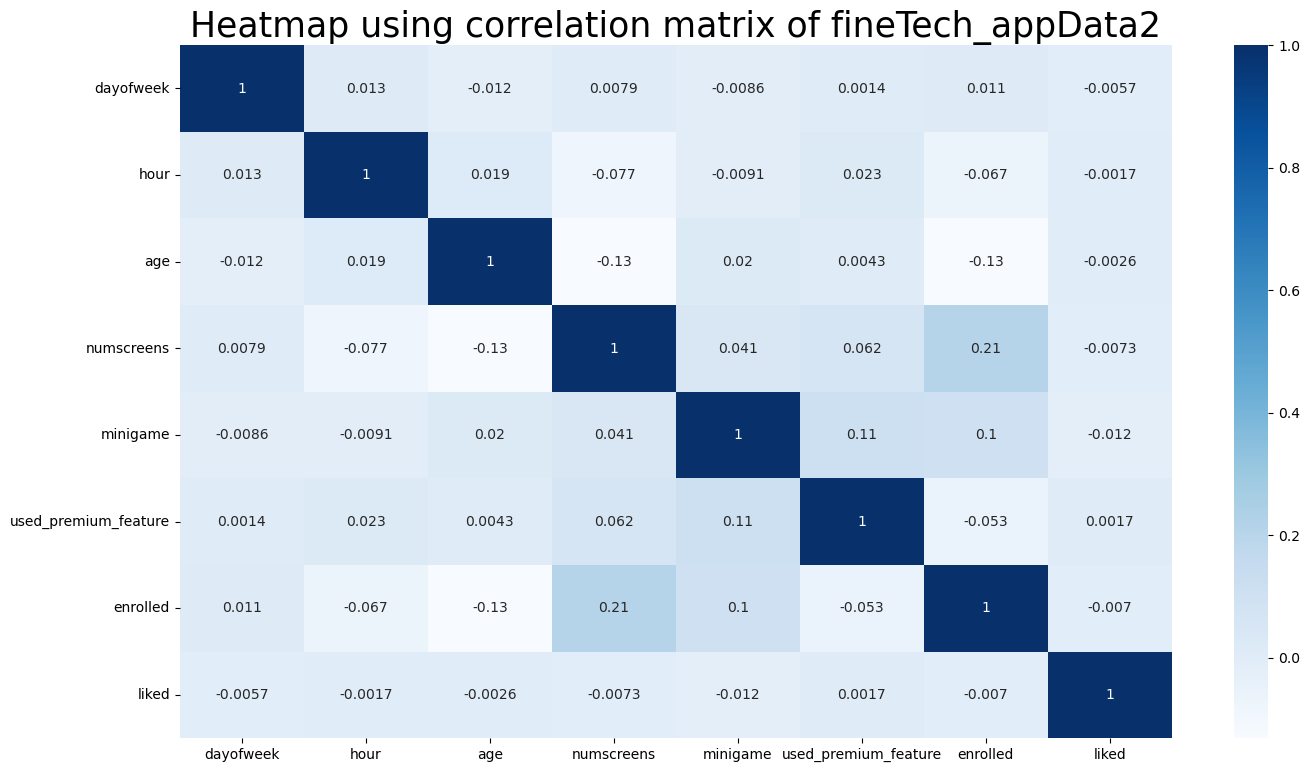

In [66]:
#Heatmap
plt.figure(figsize=(16,9)) #heatmap size in ratio 16:9

sns.heatmap(fineTech_appData2.corr(),annot = True ,cmap = 'Blues') #show heat map

plt.title ("Heatmap using correlation matrix of fineTech_appData2",
          fontsize = 25 ) #title of heatmap

In the fineTech_appData2 dataset, there is no strong correlation between any features.

There is little correlation between ‘numscreens’ and ‘enrolled’. It means that those customers saw more screen they are taking premium app.

There is a slight correlation between ‘minigame’ with ‘enrolled’ and ‘used_premium_feature’.

The slightly negative correlation between ‘age’ with ‘enrolled’ and ‘numscreens’. It means that older customers do not use the premium app and they don’t see multiple screens.

# Pair plot of dataset

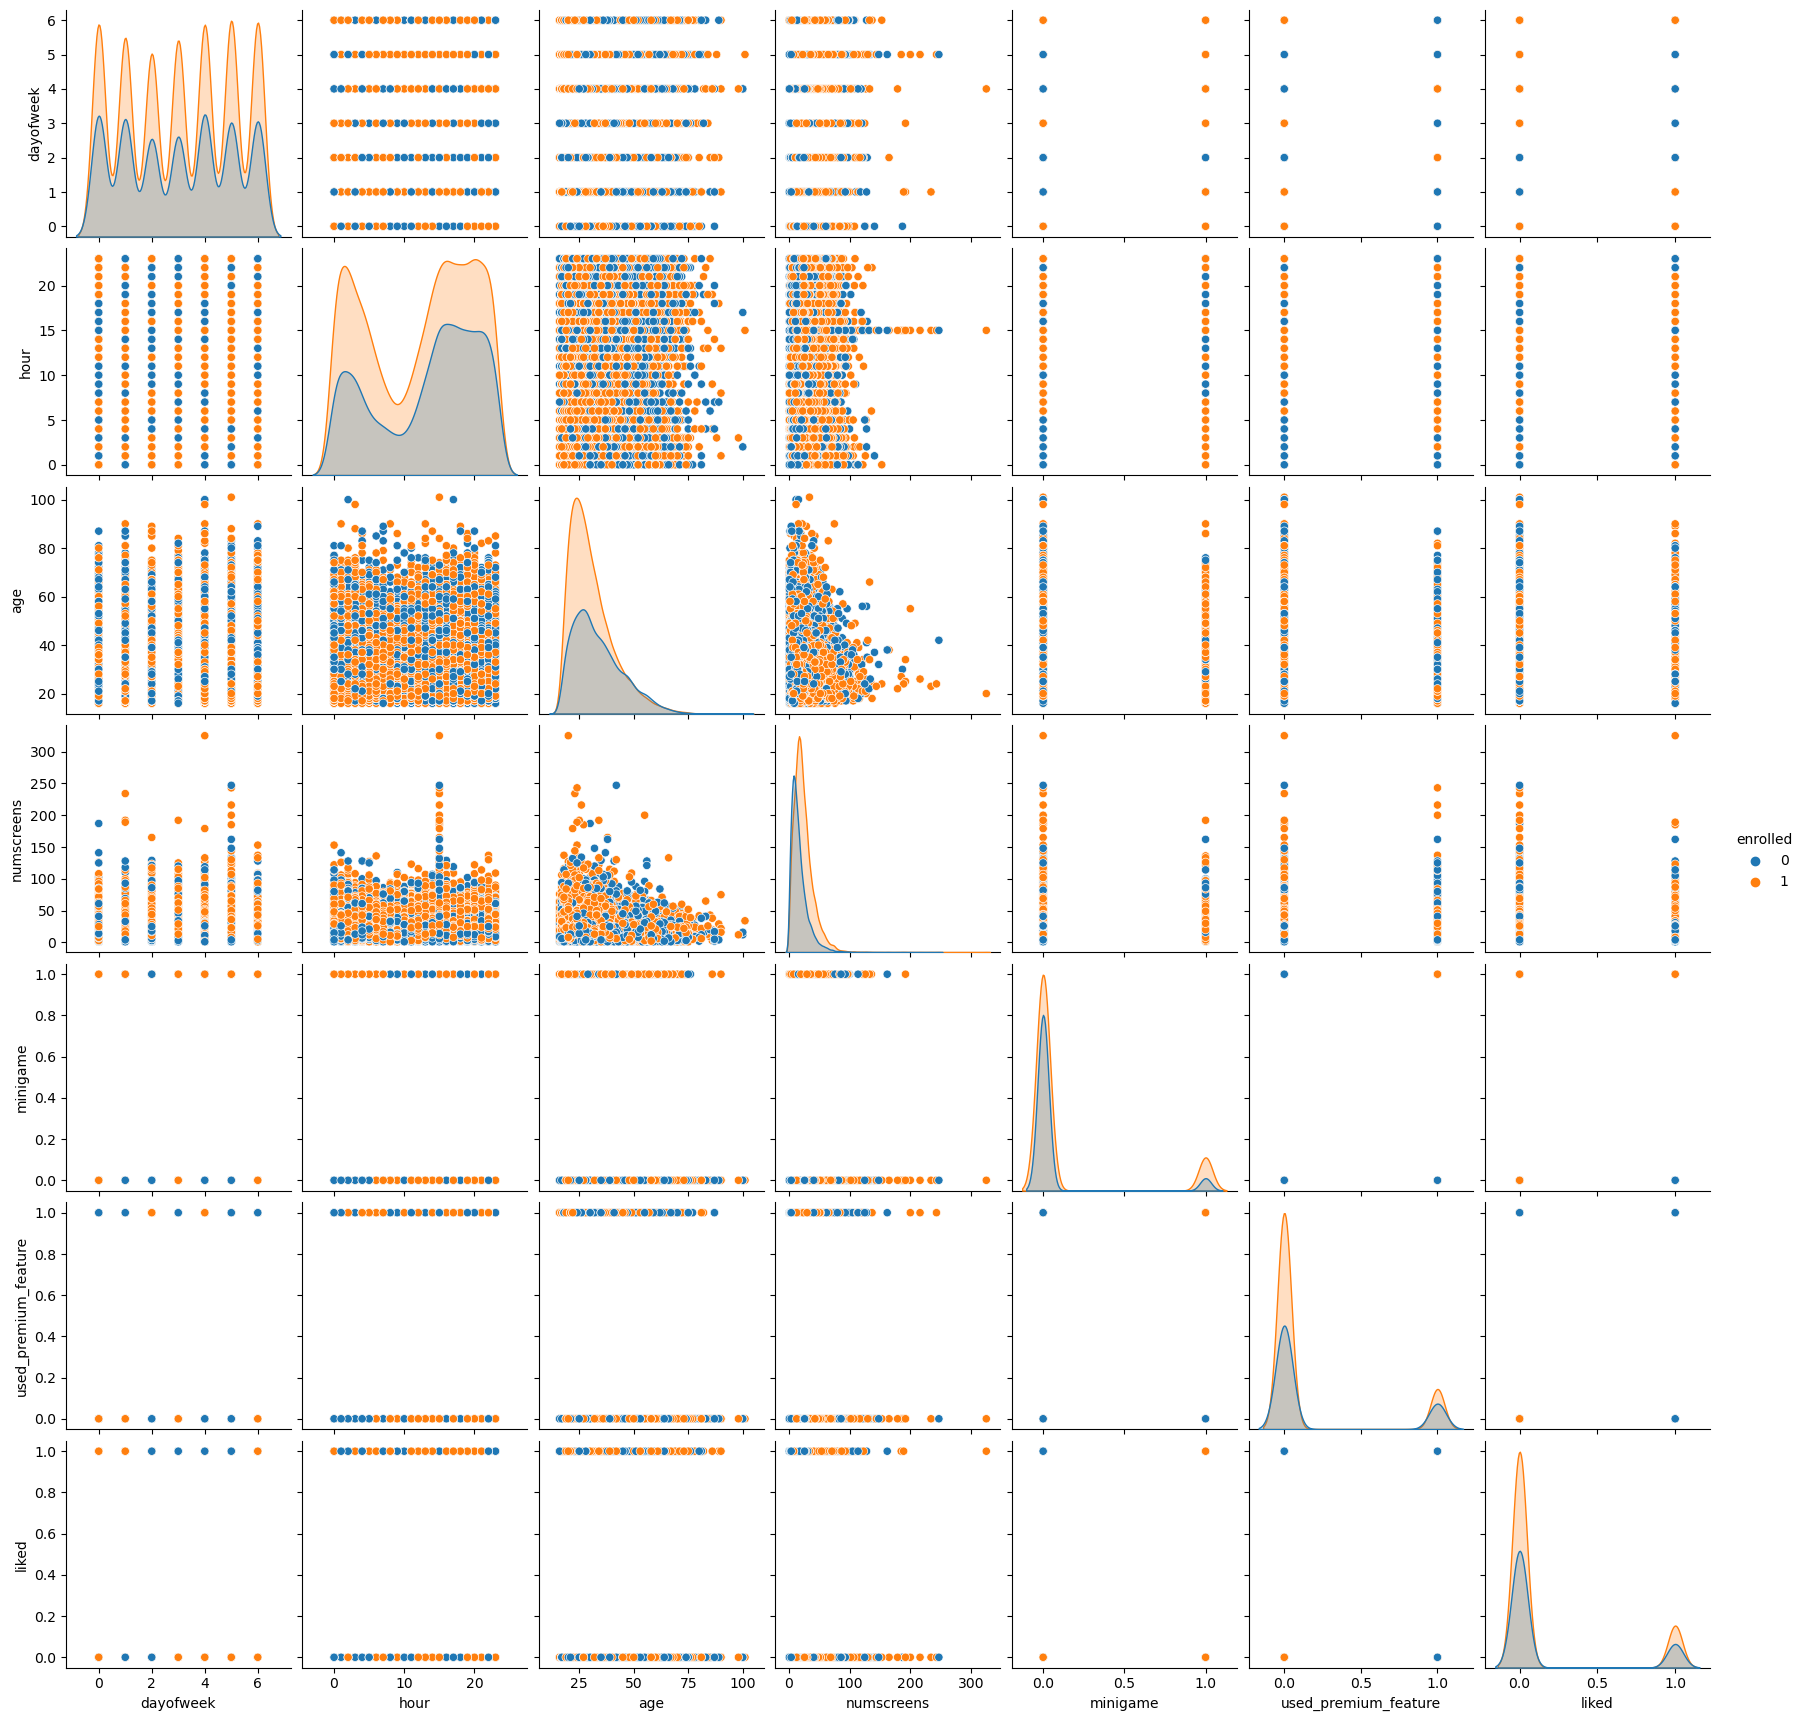

In [69]:
# The pair plot helps to visualize the distribution of data and scatter plot.

# for show graph in seperate window

sns.pairplot(fineTech_appData2,hue = 'enrolled')

In [70]:
#In pair plot we can see, the maximum features have two values like 0 and 1 and orange dots show the enrolled customer’s features.

# So we visualize the counterplot of enrolled data.

# Countplot of enrolled

<Axes: xlabel='enrolled', ylabel='count'>

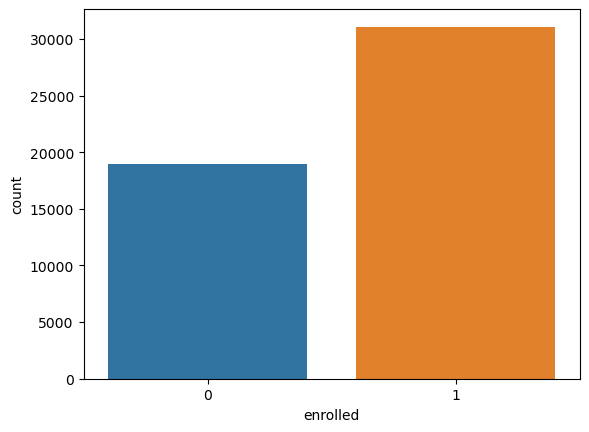

In [77]:
# Show counterplot of 'enrolled' feature
sns.countplot(x=fineTech_appData2.enrolled)

In [78]:
# Here you can see the exact value of enrolled & not enrolled customers.

In [80]:
# values of enrolled and not enrolled customers
print("not enrolled users =",(fineTech_appData.enrolled <1).sum(),"out of 50000") 
print("enrolled user= ",(fineTech_appData.enrolled==1).sum(),"out of 50000" )

not enrolled users = 18926 out of 50000
enrolled user=  31074 out of 50000


# PLOT HISTOGRAM FOR EACH FEATURE SEPRATELY -->


## Histogram of each feature of dataset

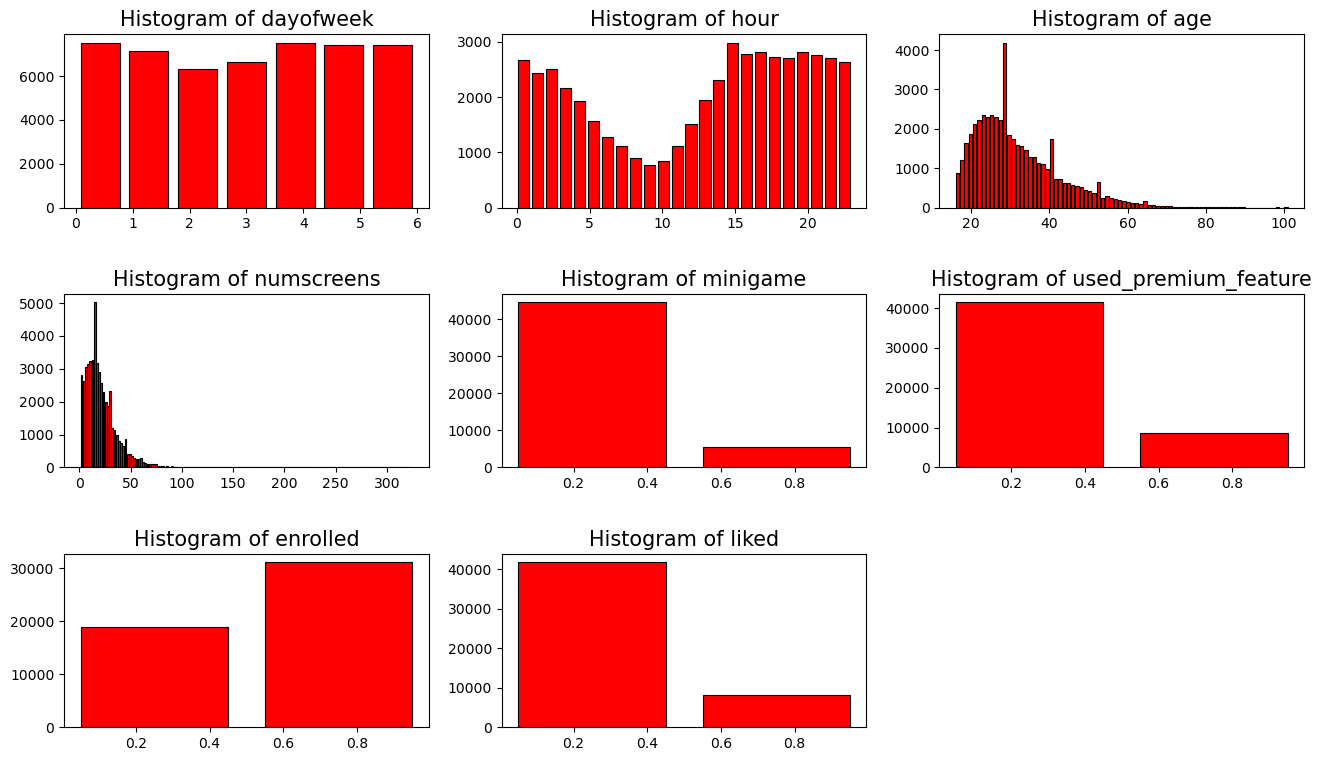

In [83]:
#In pair plot, we saw the distribution of each feature but here we visualize in the histogram to understand easily.

# plot histogram 

plt.figure(figsize = (16,9))  #figure size in ratio 16:9
features = fineTech_appData2.columns  #list of columns name

for i,j in enumerate (features):
    plt.subplot(3,3,i+1)   #create subplot for histogram
    plt.title("Histogram of {}".format(j),fontsize = 15) #title of histogram
    
    bins = len(fineTech_appData2[j].unique()) #bins for histogram
    plt.hist(fineTech_appData2[j],bins = bins ,rwidth = 0.8, color = "red",ec="skyblue",edgecolor = "black", linewidth = 0.8, ) # plot histogram
     
plt.subplots_adjust(hspace = 0.5 )  #space between horizontal axes (subplot)

In [84]:
#In the above histogram, we can see minigame, used_primium_feature, enrolled, and like they have only two values and how they distributed.

#The histogram of ‘dayofweek’ shows, on Tuesday and Wednesday slightly fewer customer registered the app.

#The histogram of ‘hour’ shows the less customer register on the app around 10 AM.

#The ‘age’ histogram shows, the maximum customers are younger.

#The ‘numsreens’ histogram shows the few customers saw more than 40 screens.

# Correlation barplot with ‘enrolled’ feature

In [85]:
#Now we are trying to know which feature is strongly correlated with ‘enrolled’ feature with positive or negative through barplot.


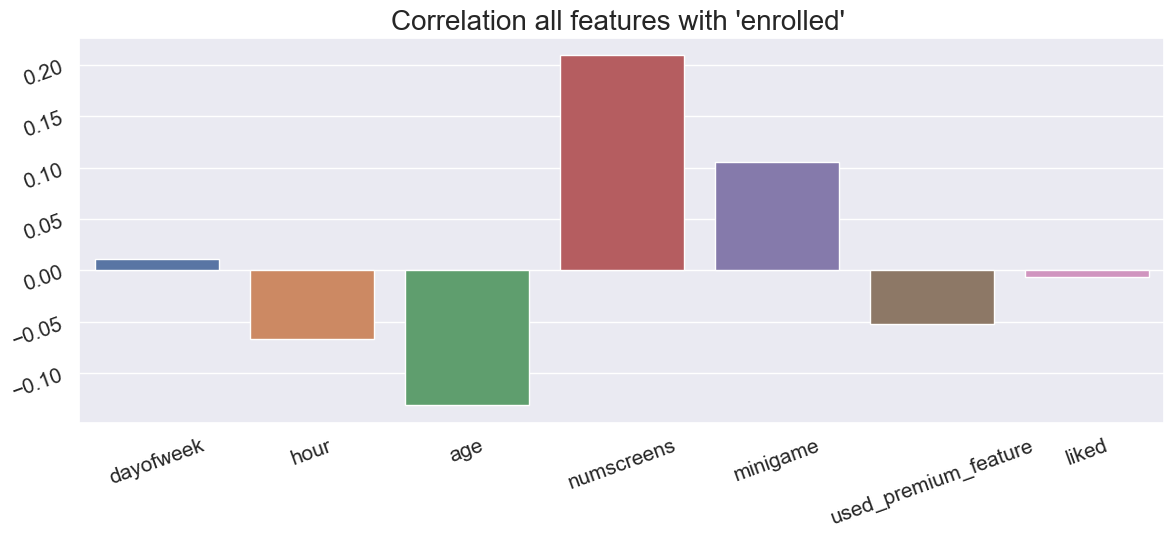

In [92]:
# show corelation barplot

sns.set()  # set background dark grid
plt.figure(figsize=(14, 5))
plt.title("Correlation all features with 'enrolled' ", fontsize=20)
fineTech_appData3 = fineTech_appData2.drop(['enrolled'], axis=1)  # drop 'enrolled' feature
ax = sns.barplot(x = fineTech_appData3.columns,y = fineTech_appData3.corrwith(fineTech_appData2.enrolled))  # plot barplot
ax.tick_params(labelsize=15, labelrotation=20,color="r")  # decorate x & y ticks font

In [93]:
#We saw the heatmap correlation matrix but this was not showing correlation clearly but you can easily understand which feature 
#is how much correlated with ‘enrolled’ feature using the above barplot.

#The ‘numscreens’ and ‘minigame’ is strongly positively correlated with ‘enrolled’ feature than other feature.

#The ‘hour’, ‘age’ and ‘used_premium_feature’ are strongly negatively correlated with the ‘enrolled’ feature.

In [94]:
# Now, we are parsing ‘first_open’ and ‘enrolled_date’ object data in data and time format.

# parsing object data into data time format
 
fineTech_appData['first_open'] = [parser.parse(i) for i in fineTech_appData['first_open']]

fineTech_appData['enrolled_date'] =[parser.parse(i) if isinstance(i, str) else i for i in fineTech_appData['enrolled_date']]
 
fineTech_appData.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [95]:
fineTech_appData['time_to_enrolled']  = (fineTech_appData.enrolled_date - fineTech_appData.first_open).astype('timedelta64[h]')

In [96]:
#Showing the distribution of time taken to enrolled the app.


(array([2.8195e+04, 1.0320e+03, 5.6700e+02, 4.2500e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([   0. ,  543.4, 1086.8, 1630.2, 2173.6, 2717. , 3260.4, 3803.8,
        4347.2, 4890.6, 5434. ]),
 <BarContainer object of 10 artists>)

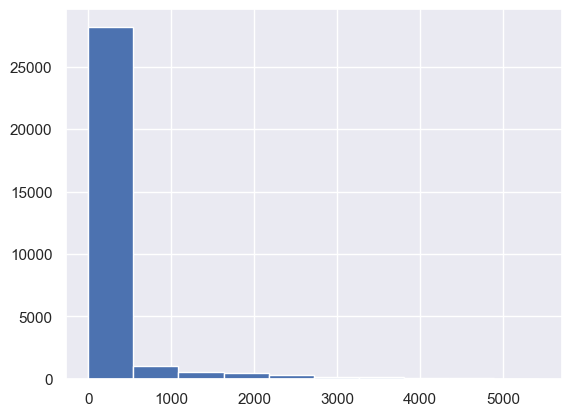

In [97]:
# Plot histogram
plt.hist(fineTech_appData['time_to_enrolled'].dropna())

In [98]:
# let’s try to show the distribution in range 0 to 100 hours.

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

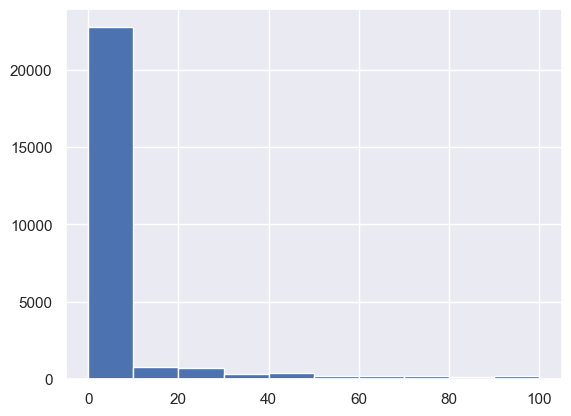

In [99]:
# Plot histogram
plt.hist(fineTech_appData['time_to_enrolled'].dropna(), range=(0, 100))

In [100]:
#In the above histogram, we know the maximum customers have enrolled the app in 10 hours from the registration.

# Feature selection

In [101]:
# We are considering those custrmers have enrolled after 48 hours as 0
# Those customers have enrolled after 48 hours set as 0

fineTech_appData.loc[fineTech_appData.time_to_enrolled > 48 , 'enrolled'] = 0

In [102]:
# Drop some 'time_to_enrolled', 'enrolled_date', 'first_open' fearutres they are not strongly correlated to the result.

In [103]:
fineTech_appData.drop(columns = ['time_to_enrolled', 'enrolled_date', 'first_open'], inplace = True)

In [104]:
#Read another CSV file that contains the top screens name.

#To download this file, click on the below button.

In [118]:
# read csv file and convert it into nupmpy array

fineTech_app_screen_Data = pd.read_csv(r"top_screens.csv").top_screens.values

fineTech_app_screen_Data

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [119]:
fineTech_appData['screen_list'] = fineTech_appData.screen_list.astype(str)+ ','

In [120]:
fineTech_app_screen_Data

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [121]:
# The ‘Screen_list’ contains string values but we can’t use it directly. 
# So to solve this problem we are taking each screen name from ‘fineTech_app_screen_Data’ and append as a column by the same name to ‘fineTech_appData’.
# Then check this screen name is available in ‘screen_list’ if it is available then add value 1 else 0 in the appended column.

In [122]:
# string into to number
 
for screen_name in fineTech_app_screen_Data:
    fineTech_appData[screen_name] = fineTech_appData.screen_list.str.contains(screen_name).astype(int)
    fineTech_appData['screen_list'] = fineTech_appData.screen_list.str.replace(screen_name+",", "")

In [123]:
# get shape
fineTech_appData.shape

(50000, 70)

In [124]:
#You can see the shape of the dataset has changed from 12 to 68 columns.

# head of DataFrame
fineTech_appData.head(6)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,",",3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,56480,2,9,20,"Home,ScanPreview,VerifySSN,product_review,prod...",14,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
#Those screens are not availble in ‘fineTech_app_screen_Data’ that are counted and conted number store in new column by 
# name ‘remain_screen_list’.

In [126]:
# remain screen in 'screen_list'
fineTech_appData.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,,'

In [127]:
'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

# count remain screen list and store counted number in 'remain_screen_list'
 
fineTech_appData['remain_screen_list'] = fineTech_appData.screen_list.str.count(",")

In [128]:
#Droping ‘screen_list’ column.

In [129]:
# Drop the 'screen_list'
fineTech_appData.drop(columns = ['screen_list'], inplace=True)

In [130]:
#We have total columns 68

In [134]:
# total columns
fineTech_appData.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Unnamed: 0',
       'top_screens', 'Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Credit3Dashboard', 'Loan3',
       'CC1Category', 'Splash', 'Loan', 'CC1', 'RewardsContainer', 'Credit3',
       'Credit1', 'EditProfile', 'Credit2', 'Finances', 'CC3', 'Saving9',
       'Saving1', 'Alerts', 'Saving8', 'Saving10', 'Leaderboard', 'Saving4',
       'VerifyMobile', 'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'Securi

In [135]:
#All the saving screens correlated with each other that’s we are taking the sum of all saving screens in each row and store in a single row for all customers.


In [136]:
# take sum of all saving screen in one place
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
fineTech_appData['saving_screens_count'] = fineTech_appData[saving_screens].sum(axis = 1)
fineTech_appData.drop(columns = saving_screens, inplace = True)


In [137]:
#similarly for credit, CC1 and loan screens.

In [138]:
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
fineTech_appData['credit_screens_count'] = fineTech_appData[credit_screens].sum(axis = 1)
fineTech_appData.drop(columns = credit_screens, axis = 1, inplace = True)

In [139]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
fineTech_appData['cc_screens_count'] = fineTech_appData[cc_screens].sum(axis = 1)
fineTech_appData.drop(columns = cc_screens, inplace = True)

In [143]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
fineTech_appData['loan_screens_count'] = fineTech_appData[loan_screens].sum(axis = 1)
fineTech_appData.drop(columns = loan_screens, inplace = True)

In [144]:
#Now, you can see the shape of DataFrame is reduced.

In [145]:
fineTech_appData.shape

(50000, 52)

In [146]:
#See information of fineTech_appData

fineTech_appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int32
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   Unnamed: 0               50000 non-null  int32
 10  top_screens              50000 non-null  int32
 11  location                 50000 non-null  int32
 12  Institutions             50000 non-null  int32
 13  VerifyPhone              50000 non-null  int32
 14  BankVerification         50000 non-null  int32
 15  Ve

In [147]:
# Numerical distribution of fineTech_appData
fineTech_appData.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Unnamed: 0,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.0,...,0.014220,0.013340,0.013400,0.008200,0.007580,7.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.0,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000,5.00000,3.000000,3.000000



# Heatmap with the correlation matrix

<Axes: >

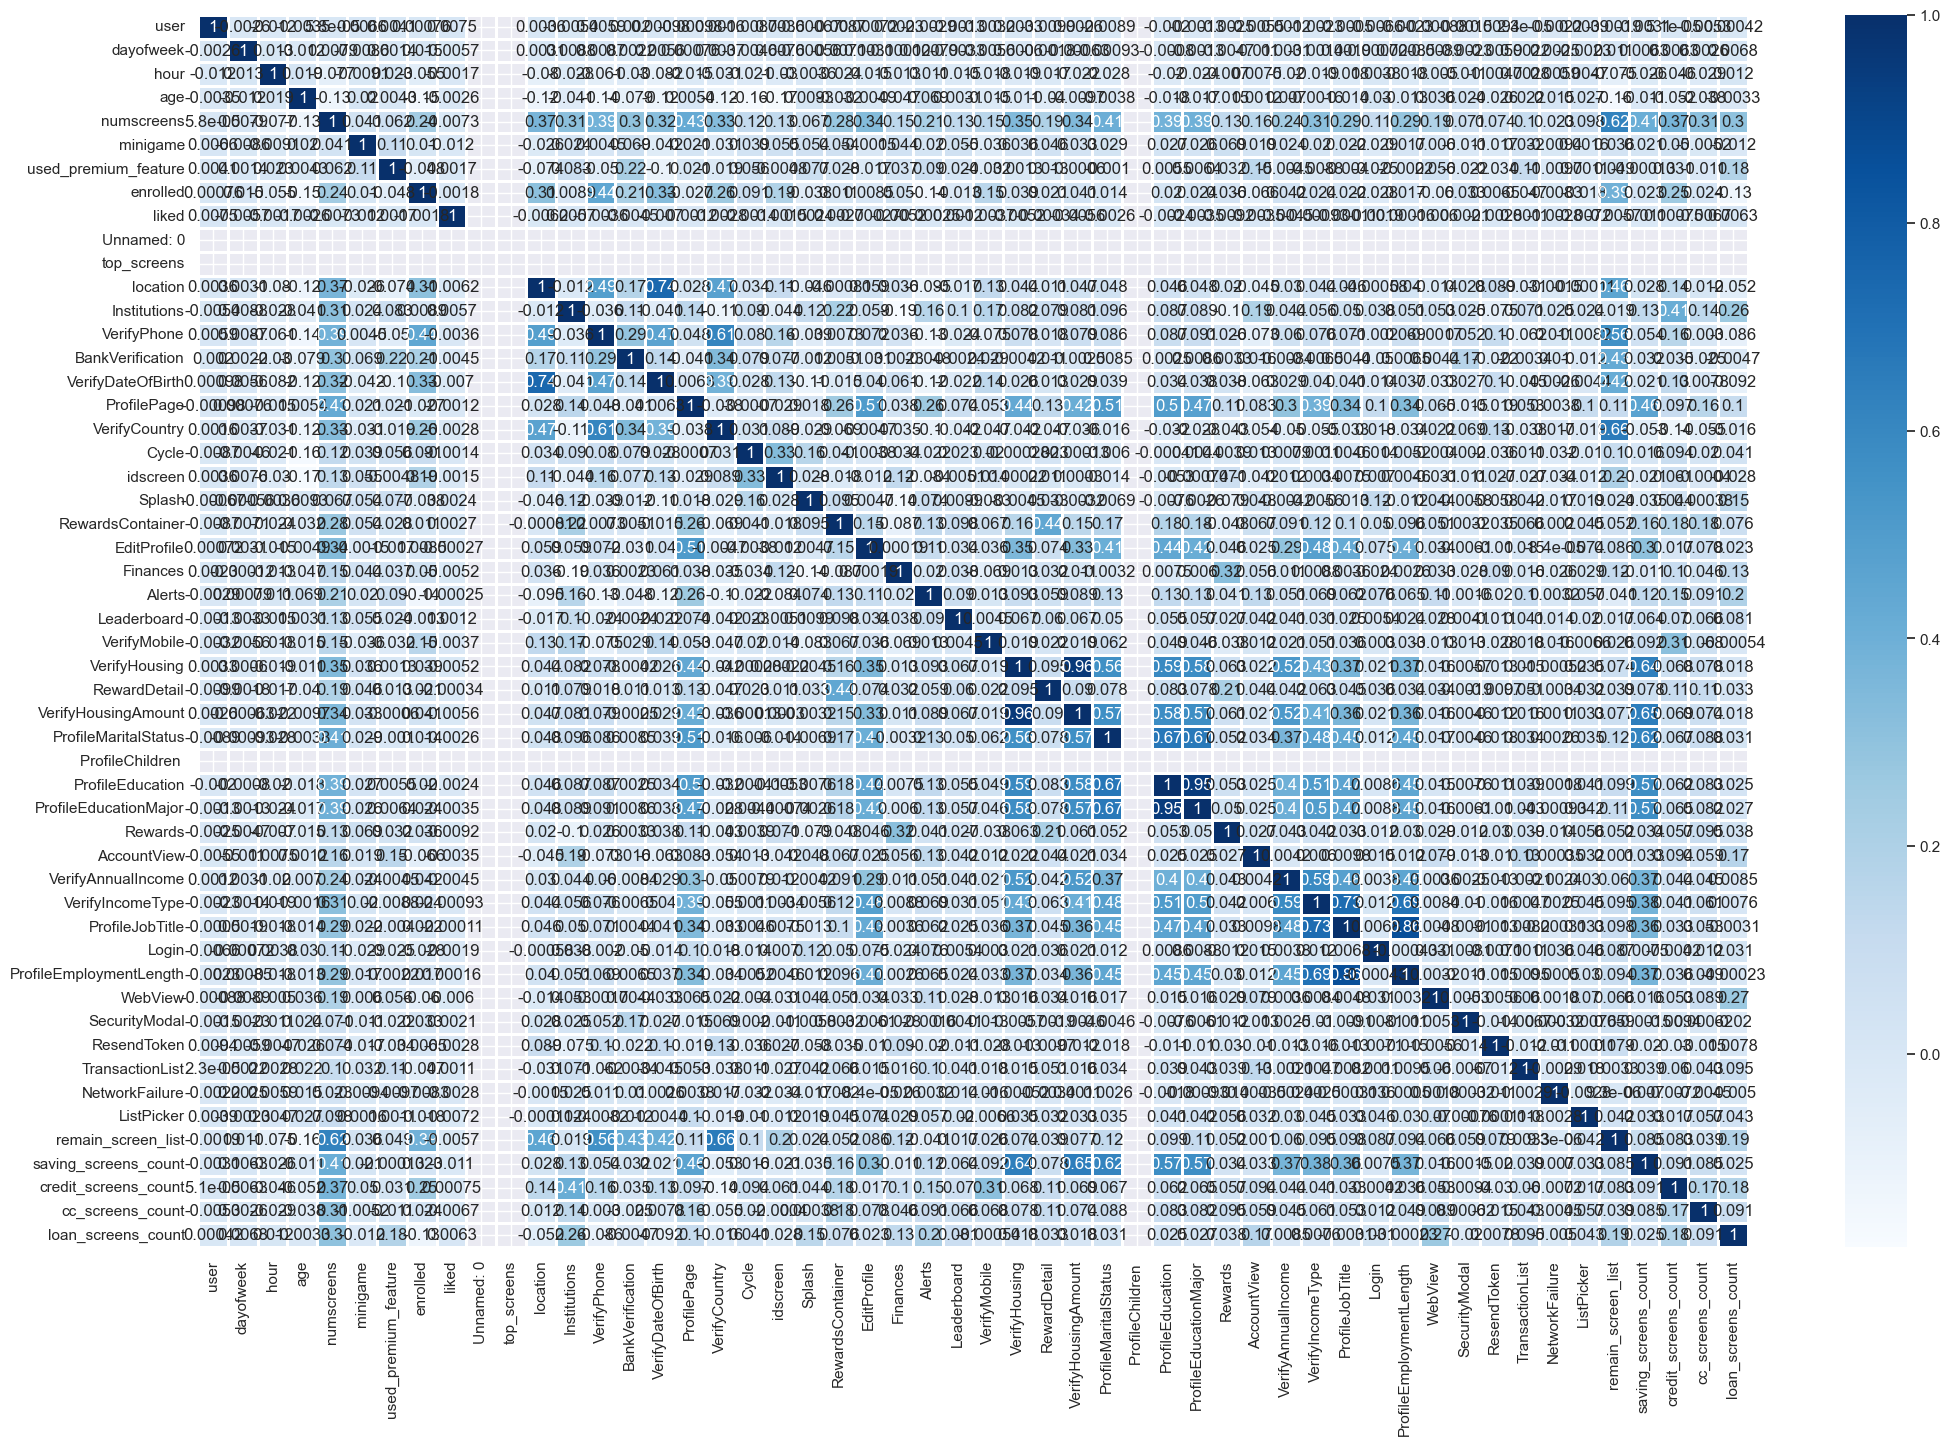

In [148]:
# Heatmap with correlation matrix of new fineTech_appData
 
plt.figure(figsize = (25,16)) 
sns.heatmap(fineTech_appData.corr(), annot = True, linewidth =2,cmap='Blues')

# Data preprocessing

In [153]:
# Split dataset in Train and Test

clean_fineTech_appData = fineTech_appData
target = fineTech_appData['enrolled']
fineTech_appData.drop(columns = 'enrolled', inplace = True)


KeyError: 'enrolled'

In [161]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(fineTech_appData, target, test_size = 0.2, random_state = 0)

In [162]:
fineTech_appData.shape

(50000, 51)

In [163]:
target.shape

(50000,)

In [164]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (40000, 51)
Shape of X_test =  (10000, 51)
Shape of y_train =  (40000,)
Shape of y_test =  (10000,)


In [165]:
# take User ID in another variable 
train_userID = X_train['user']
X_train.drop(columns= 'user', inplace =True)
test_userID = X_test['user']
X_test.drop(columns= 'user', inplace =True)

In [166]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of train_userID = ', train_userID.shape)
print('Shape of test_userID = ', test_userID.shape)

Shape of X_train =  (40000, 50)
Shape of X_test =  (10000, 50)
Shape of train_userID =  (40000,)
Shape of test_userID =  (10000,)


# Feature Scaling

In [169]:
#The multiple features in the different units so for the best accuracy need to convert all features in a single unit.


In [172]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Model Building


In [173]:
#The target variable is categorical type 0 and 1, so we have to use supervised classification algorithms.

#To build the best model, we have to train and test the dataset with multiple Machine Learning algorithms then we can find the best ML model.

#First, we import the required packages.

In [175]:
#import requires packages

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Decision Tree Classifier

In [176]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_model.fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)

accuracy_score(y_test,y_pred_dt)*100

69.91000000000001

In [177]:
# train with standard scaling dataset

dt_model12 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_model12.fit(X_train_sc , y_train)
y_pred_dt_sc = dt_model12.predict(X_test_sc)

accuracy_score(y_test,y_pred_dt_sc) *100

69.82000000000001

# K – Nearest Neighbor Classifier

In [180]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric ='minkowski',p=2)
knn_model.fit(X_train,y_train)
y_pred_knn = knn_model.predict(X_test)

accuracy_score(y_test,y_pred_knn)*100

69.78

In [181]:
# train with Standert Scaling dataset
knn_model2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model2.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_knn_sc)*100

73.14

# Naive Bayes Classifier

In [182]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
 
accuracy_score(y_test, y_pred_nb)*100

71.14

In [183]:
# train with Standert Scaling dataset
nb_model2 = GaussianNB()
nb_model2.fit(X_train_sc, y_train)
y_pred_nb_sc = nb_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_nb_sc)*100

71.14

# Random Forest Classifier

In [184]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
 
accuracy_score(y_test, y_pred_rf)*100

76.79

In [185]:
# train with Standert Scaling dataset
rf_model2 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_rf_sc)*100

76.78

# Logistic Regression

In [186]:

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 0,max_iter=1000) #max_iter because it reaches max iteration limit(defult iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
 
accuracy_score(y_test, y_pred_lr)*100

76.83

In [187]:
# train with Standert Scaling dataset
lr_model2 = LogisticRegression(random_state = 0,max_iter=1000)
lr_model2.fit(X_train_sc, y_train)
y_pred_lr_sc = lr_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_lr_sc)*100

76.8

# Support Vector Classifier

In [188]:
# Support Vector Machine
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
 
accuracy_score(y_test, y_pred_svc)*100

76.11

In [189]:
# train with Standert Scaling dataset
svc_model2 = SVC()
svc_model2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_svc_sc)*100

77.89

# XGBoost Classifier

In [193]:
pip install xgboost



     ---------------------------------------- 70.9/70.9 MB 2.2 MB/s eta 0:00:00


In [194]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier(eval_metric='mlogloss',use_label_encoder=False)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred_xgb)*100

C:\Users\Prithviraj\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


78.10000000000001

In [195]:
# train with Standert Scaling dataset
xgb_model2 = XGBClassifier(eval_metric='mlogloss',use_label_encoder=False)
xgb_model2.fit(X_train_sc, y_train)
y_pred_xgb_sc = xgb_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_xgb_sc)*100

C:\Users\Prithviraj\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


78.10000000000001

In [196]:
# XGB classifier with parameter tuning
xgb_model_pt1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
    eval_metric='mlogloss',
use_label_encoder=False) #From the warning log, you will know what eval_metric algorithm to set to remove the warning
 
xgb_model_pt1.fit(X_train, y_train)
y_pred_xgb_pt1 = xgb_model_pt1.predict(X_test)
 
accuracy_score(y_test, y_pred_xgb_pt1)*100

C:\Users\Prithviraj\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


78.95

In [197]:
# XGB classifier with parameter tuning
# train with Stander Scaling dataset
xgb_model_pt2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
    eval_metric='mlogloss',
use_label_encoder=False) #From the warning log, you will know what eval_metric algorithm to set to remove the warning
 
xgb_model_pt2.fit(X_train_sc, y_train)
y_pred_xgb_sc_pt2 = xgb_model_pt2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_xgb_sc_pt2)*100

C:\Users\Prithviraj\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


78.91

In [198]:
len(y_train)

40000

In [199]:
len(y_pred_xgb_sc_pt2)

10000

In [200]:
#We observ that Support Vector Classifier and XGBoost Classifier give best accuracy than ohter ML algorithm. 
#But we will continue with XGBoost classifier because the accuracy is slightly higher than SVC.

Text(0.5, 1.0, 'Confussion Matrix')

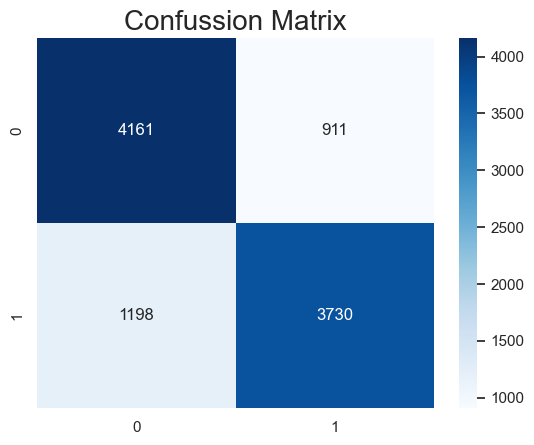

In [201]:
# confussion matrix
cm_xgb_pt2 = confusion_matrix(y_test, y_pred_xgb_sc_pt2)
sns.heatmap(cm_xgb_pt2, annot = True, fmt = 'g', cmap='Blues')
plt.title("Confussion Matrix", fontsize = 20) 

In [202]:
#The model is giving type II error higher than type I.


# Classification report of ML model

In [203]:
# Clasification Report
cr_xgb_pt2 = classification_report(y_test, y_pred_xgb_sc_pt2)
 
print("Classification report >>> \n", cr_xgb_pt2)

Classification report >>> 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      5072
           1       0.80      0.76      0.78      4928

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



# Conclusion


To get more accuracy, we train all supervised classification algorithms but you can try out a few of them which are always popular.

After training all algorithms, we found that SVC and XGBoost classifiers are given high accuracy than remain but we have chosen XGBoost.

As ML Engineer, we always retrain the deployed model after some period of time to sustain the accuracy of the model. We hope our efforts will give more profit to the fin-tech company.